![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

## [Introduction to Network Analysis](0_Intro_Network_Analysis.ipynb)

# Table of Contents

* [Installation](#Installation)
* [First steps](#First-steps)
* [Reading Data from a File](#Reading-Data-from-a-File)

# Installation


For installing **networkx** we can use **conda** or **pip**: _'conda install networkx'_. 

It could be good to update first the packages: _'conda update --all'_.

# First steps
Create an empty graph with no nodes

In [1]:
import networkx as nx

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
G = nx.Graph()

In [4]:
nx.number_of_nodes(G)

0

Add a node

In [5]:
G.add_node('1')

In [6]:
nx.number_of_nodes(G)

1

In [7]:
G.nodes

NodeView(('1',))

If you add edges of nodes that has not been added, network will add the nodes automatically.

In [8]:
G.add_edge('2', '3')

In [9]:
G.nodes()

NodeView(('1', '2', '3'))

For more info about Graph.nodes() see [Networkx manual](https://networkx.github.io/documentation/networkx-2.1/reference/classes/generated/networkx.Graph.nodes.html)

In [10]:
print(G.nodes)

['1', '2', '3']


In [11]:
G.edges

EdgeView([('2', '3')])

In [12]:
print(G.edges)

[('2', '3')]


## Building a simple graph

In [13]:
import networkx as nx

In [14]:
G = nx.Graph()

In [15]:
G.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'D')]) # using a list of edge tuples

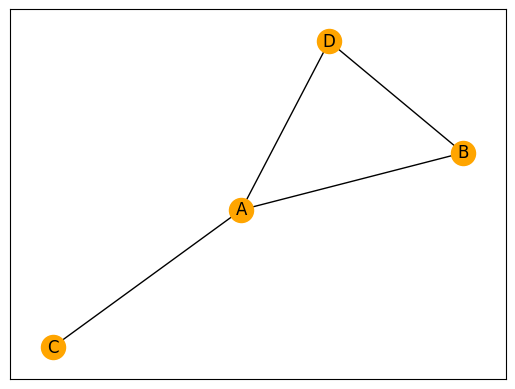

In [16]:
nx.draw_networkx(G,  node_color='orange')

## Undirected and directed graphs

Now we create an  undirected graph using the class **Graph**.

In [17]:
U = nx.Graph()

In [18]:
U.add_edge('A', 'B')

In [19]:
U.add_edge('A', 'C')

In [20]:
nx.adjacency_matrix(U).todense()

array([[0, 1, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [21]:
nx.to_scipy_sparse_array(U).todense()

array([[0, 1, 1],
       [1, 0, 0],
       [1, 0, 0]])

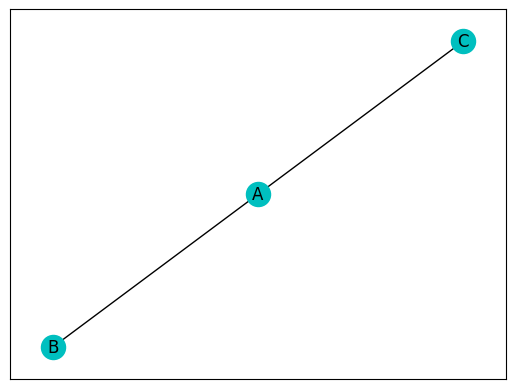

In [22]:
nx.draw_networkx(U,  node_color='c')

We use the class **DiGraph** for Directed Graphs as follows.

In [23]:
D = nx.DiGraph()

In [24]:
D.add_edge('B', 'A')

In [25]:
nx.adjacency_matrix(D).todense() 

array([[0, 1],
       [0, 0]])

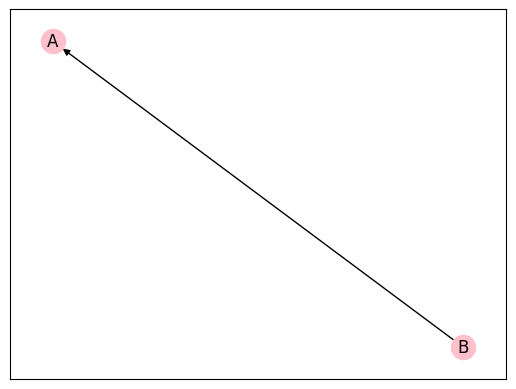

In [26]:
nx.draw_networkx(D,  node_color='pink')

## Weighted graphs

In [27]:
W = nx.Graph()

In [28]:
W.add_edge('A', 'B', weight = 2)

In [29]:
W.add_weighted_edges_from([('A', 'C', 1), ('A', 'D', 3), ('B', 'D', 4)])

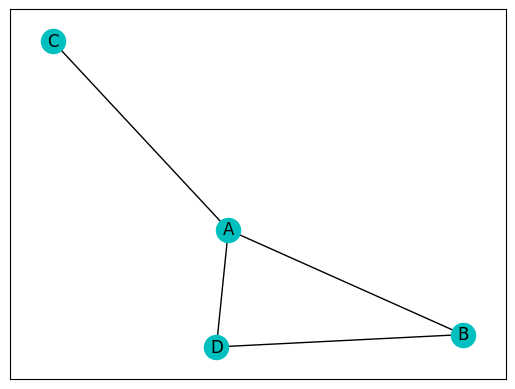

In [30]:
nx.draw_networkx(W,  node_color='c')

{('A', 'B'): Text(-0.07776005662185159, -0.3386811967059936, '2'),
 ('A', 'C'): Text(0.36944887879272426, 0.5256867154763809, '1'),
 ('A', 'D'): Text(-0.26428629994186137, -0.13563634199376917, '3'),
 ('B', 'D'): Text(-0.3694433520899971, -0.5256943837037334, '4')}

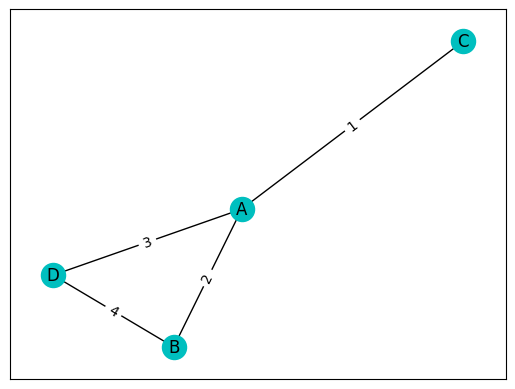

In [31]:
pos = nx.spring_layout(W)  # positions for all nodes
labels = nx.get_edge_attributes(W,'weight')
nx.draw_networkx(W, pos=pos,  node_color='c')
nx.draw_networkx_edge_labels(W, pos, edge_labels=labels)
#nx.draw_networkx_edges(G,pos,width=4, edge_color='g', arrows=False)

Filter the subset of weigthed edges over a threshold

In [32]:
strong = [(u,v) for (u, v, d) in W.edges(data=True) if d['weight'] > 2]

In [33]:
print(strong)

[('A', 'D'), ('B', 'D')]


## Signed networks

In [34]:
S = nx.Graph()

In [35]:
S.add_edge('A', 'B', sign = '+')

In [36]:
S.add_edge('A', 'C', sign = '-')

{('A', 'B'): Text(0.49999933354753434, -0.08276893508159161, '+'),
 ('A', 'C'): Text(-0.4998142645861261, 0.08273808168306745, '-')}

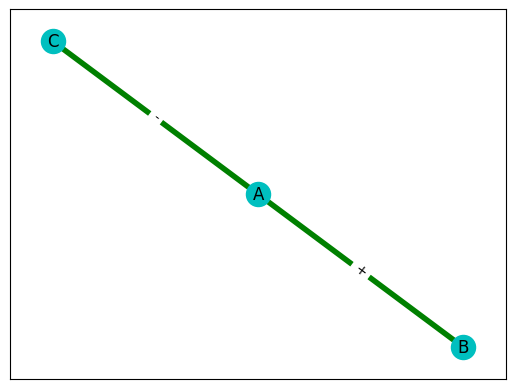

In [37]:
pos = nx.spring_layout(S)  # positions for all nodes
labels = nx.get_edge_attributes(S,'sign')
nx.draw_networkx(S, pos=pos, node_color='c',)
nx.draw_networkx_edges(S,pos,width=4, edge_color='g',  arrows=False)
nx.draw_networkx_edge_labels(S,pos,edge_labels=labels)

## Representing other relationships

In [38]:
R = nx.Graph()

In [39]:
R.add_edge('A', 'B', relation = 'friend')

In [40]:
R.add_edge('A', 'C', relation = 'father')

In [41]:
R.add_edge('A', 'D', relation = 'friend')

{('A', 'B'): Text(-0.3527611634261536, 0.3731541229775912, 'friend'),
 ('A', 'C'): Text(-0.1473141331865706, -0.4908557230159296, 'father'),
 ('A', 'D'): Text(0.4999437033123544, 0.11724575282478678, 'friend')}

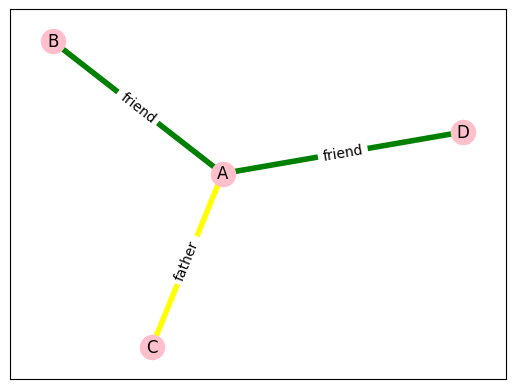

In [42]:
pos = nx.spring_layout(R)  # positions for all nodes
labels = nx.get_edge_attributes(R,'relation')
friend_edges = [k for k,v in nx.get_edge_attributes(R, 'relation').items() if v == 'friend']

edge_col = ['yellow' if not edge in friend_edges  else 'green' for edge in R.edges()]
nx.draw_networkx(R, pos=pos, node_color='pink', )
nx.draw_networkx_edges(R,pos,width=4, edge_color=edge_col, arrows=False)
nx.draw_networkx_edge_labels(R,pos,edge_labels=labels)

## Multigraphs

The same nodes can have several edges with different relationships.

In [43]:
MG = nx.MultiGraph()

In [44]:
MG.add_edge('A', 'B', relation = 'friend', color = 'pink', weight = 1)

0

In [45]:
MG.add_edge('A', 'B', relation = 'neighbour', color = 'r', weight = 3)

1

In [46]:
MG.add_edge('A', 'C', relation = 'father', color = 'c', weight = 1)

0

In [47]:
MG.add_edge('A', 'D', relation = 'friend', color = 'b', weight = 2)

0

In [48]:
MG.get_edge_data('A', 'B')

{0: {'relation': 'friend', 'color': 'pink', 'weight': 1},
 1: {'relation': 'neighbour', 'color': 'r', 'weight': 3}}

Drawing multigraphs require different methods

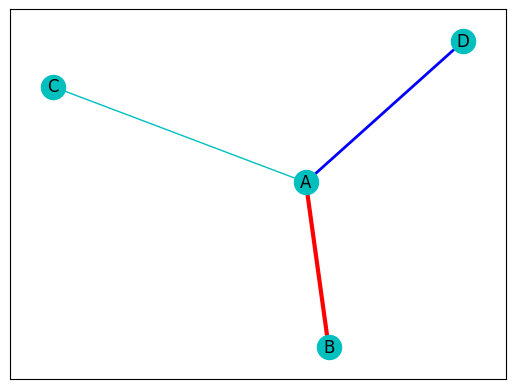

In [49]:
pos = nx.spring_layout(MG)  # positions for all nodes
#pos = nx.circular_layout(MG)

edges = MG.edges()
colors = []
weight = []

for (u,v,attrib_dict) in list(MG.edges.data()):
    colors.append(attrib_dict['color'])
    weight.append(attrib_dict['weight'])
nx.draw_networkx(MG, pos, edgelist=edges, edge_color=colors, width=weight, node_color='c')

# References
* Networkx tutorial https://networkx.github.io/documentation/stable/tutorial.html

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.